<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [2]:
pip install xgboost

In [3]:
# import 'Pandas' 
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score,roc_curve

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

#### Read the data

Load the csv file and print the first five observations.

In [5]:
# type your code here
df_sd=pd.read_csv('seedtype_data (1).csv')
df_sd.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.760000,13.380000,5.073000,3.155000,4.830000,0.000000
1,12.130000,13.730000,5.394000,3.745000,5.220000,0.000000
2,14.860000,14.670000,nan,3.258000,5.351000,0.000000
3,15.690000,14.750000,5.527000,3.514000,5.046000,0.000000
4,19.940000,16.920000,6.675000,3.763000,6.550000,1.000000


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

In [6]:
df_sd.shape

(202, 6)

In [7]:
df_sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              199 non-null    float64
 1   Perimeter         199 non-null    float64
 2   Kernel_len        193 non-null    float64
 3   Kernel_width      199 non-null    float64
 4   Kernelgroove_len  199 non-null    float64
 5   Type              199 non-null    float64
dtypes: float64(6)
memory usage: 9.6 KB


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any record where no data have been reported? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
(df_sd.isnull().sum(axis=1)==6).sum() #three rows where no data recorded.

3

In [11]:
df_sd.dropna(how='all',inplace=True)
df_sd.shape

(199, 6)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Use the visualization technique to identify the variables with missing data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

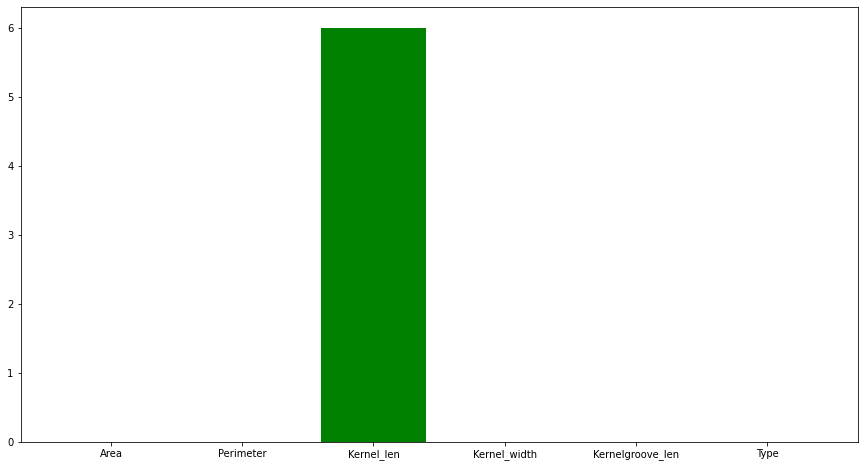

In [12]:
# type your code here
plt.figure(figsize=(15,8))

null_var = df_sd.isnull().sum()

plt.bar(x = null_var.index, height = null_var.values,color='g')

plt.show()

In [13]:
null_var

Area                0
Perimeter           0
Kernel_len          6
Kernel_width        0
Kernelgroove_len    0
Type                0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Use the appropriate technique to replace the missing data in the variable representing the length of a wheat kernel
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
df_sd['Kernel_len']=df_sd['Kernel_len'].fillna(df_sd['Kernel_len'].median())

In [16]:
df_sd.isnull().sum()

Area                0
Perimeter           0
Kernel_len          0
Kernel_width        0
Kernelgroove_len    0
Type                0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the variables containing extreme values and remove such observations, if present
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here
df_sd.skew()

Area                0.441779
Perimeter           0.285804
Kernel_len          0.503399
Kernel_width       -0.175528
Kernelgroove_len    0.533254
Type                0.602467
dtype: float64

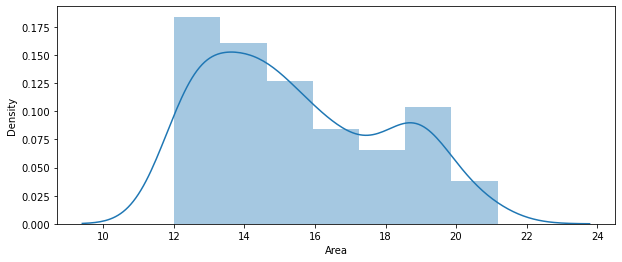

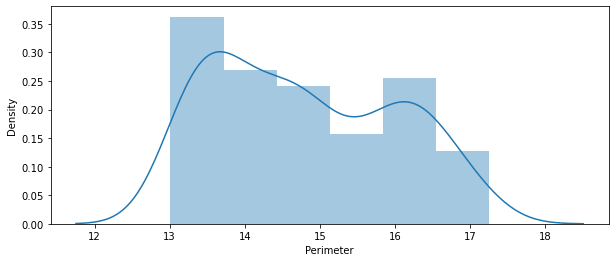

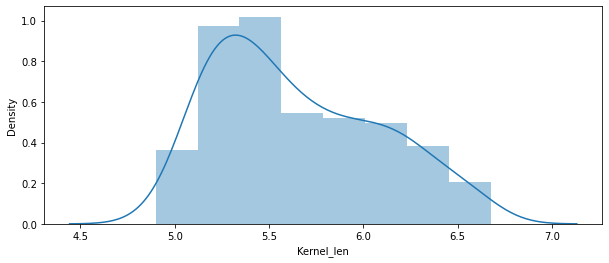

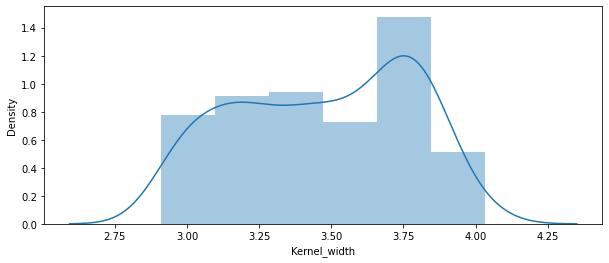

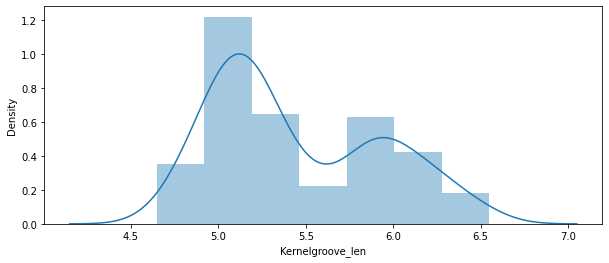

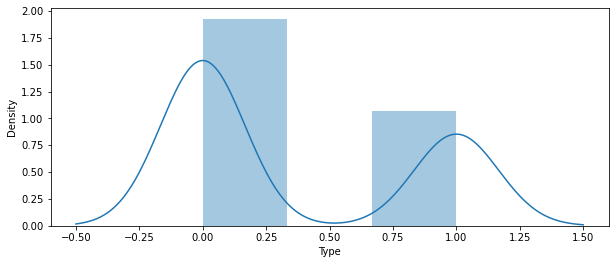

In [26]:
for i in df_sd.columns:
    plt.figure(figsize = (10,4))
    sns.distplot(df_sd[i])
    plt.show()     #there are not much skewness in the dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Apply the gradient boosting on 80% of the data with 250 estimators each of maximum depth 2. Also, calculate the precision and sensitivity using the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
x=df_sd.drop('Type',axis=1)
y=df_sd.Type
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (159, 5)
x_test_shape: (40, 5)
y_train_shape: (159,)
y_test_shape: (40,)


In [28]:
gb=GradientBoostingClassifier(n_estimators=250,max_depth=2)
gb.fit(x_train,y_train)
y_test_pred=gb.predict(x_test)


In [31]:
c_mt=confusion_matrix(y_test,y_test_pred)
c_mt

array([[29,  0],
       [ 0, 11]], dtype=int64)

In [33]:
precision = c_mt[1,1] / (c_mt[1,1] + c_mt[0,1])
print('Precision :',precision)

sensitivity = c_mt[1,1] / (c_mt[1,0] + c_mt[1,1])
print('Sensitivity :',sensitivity)

Precision : 1.0
Sensitivity : 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Create 80 stumps using AdaBoost and find the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

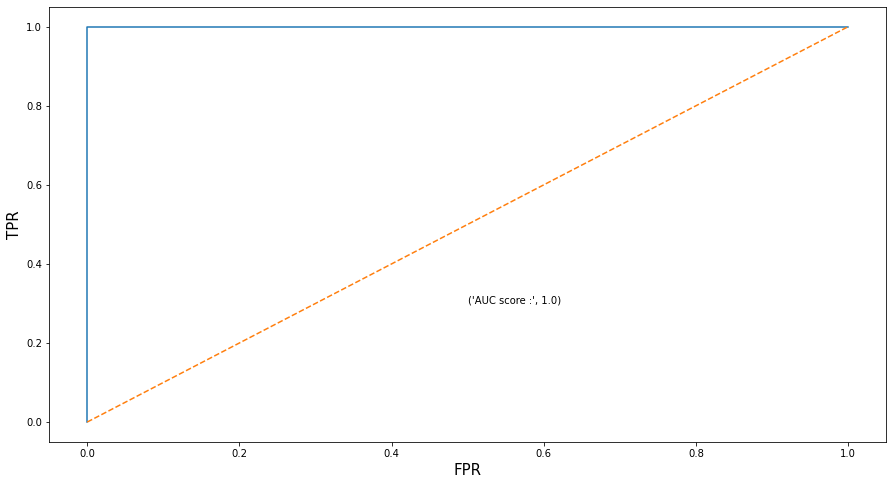

In [34]:
# type your code here
ada=AdaBoostClassifier(n_estimators=80)
ada.fit(x_train,y_train)
y_test_pred=ada.predict(x_test)
y_test_prob=ada.predict_proba(x_test)[:,1]

fpr,tpr,thr=roc_curve(y_test,y_test_prob)

plt.figure(figsize = (15,8))

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, '--')

plt.xlabel('FPR',fontsize = 15)
plt.ylabel('TPR', fontsize = 15)

plt.text(x = 0.5, y = 0.3, s = ('AUC score :',roc_auc_score(y_test, y_test_prob)))

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Select the optimal maximum depth from the given values for 180 base learners to build the gradient boosting classifier (consider 3-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth = [2, 3, 4, 5, 6, 7, 8]

In [37]:
from sklearn.model_selection import GridSearchCV

In [40]:
# type your code here
gbs=GradientBoostingClassifier()
params={'max_depth':[2,3,4,5,6,7,8]}
gsearch=GridSearchCV(gbs,param_grid=params,cv=3,scoring='roc_auc')
gsearch.fit(x,y)
gsearch.best_params_

{'max_depth': 2}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

[21:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

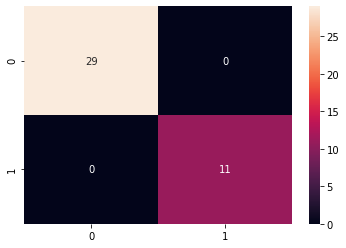

In [43]:
# type your code here
xgb=XGBClassifier(learning_rate=0.4,gamma=3)
xgb.fit(x_train,y_train)
y_test_pred=xgb.predict(x_test)

c_m=confusion_matrix(y_test,y_test_pred)
sns.heatmap(c_m,annot=True)

In [44]:
total = c_m[0,0] + c_m[0,1] + c_m[1,0] + c_m[1,1]

Accuracy = (c_m[0,0] + c_m[1,1]) / total

print('Accuracy :', Accuracy)

Accuracy : 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the stacking technique on 70% of the data with the 9-NN and Naive Bayes model as base learners. Consider the Adaboost model as a final estimator. Also, compute the AUC score of the model </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (139, 5)
x_test_shape: (60, 5)
y_train_shape: (139,)
y_test_shape: (60,)


In [47]:
from sklearn.ensemble import StackingClassifier

base_learner = [('KNeighbors',KNeighborsClassifier(n_neighbors = 9)),
               ('GaussianNB',GaussianNB())]

stack = StackingClassifier(estimators = base_learner, final_estimator = AdaBoostClassifier(random_state = 10))

stack.fit(x_train, y_train)

StackingClassifier(estimators=[('KNeighbors',
                                KNeighborsClassifier(n_neighbors=9)),
                               ('GaussianNB', GaussianNB())],
                   final_estimator=AdaBoostClassifier(random_state=10))

In [49]:
y_test_prob = stack.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_auc_score

print('AUC score :', roc_auc_score(y_test, y_test_prob))

AUC score : 0.9871630295250321


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the base learners in Q9 and build a stacking model with the XGBoost as final estimator. Compute the AUC score of the model and compare it with the result of Q9 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# type your code here
stack = StackingClassifier(estimators = base_learner, final_estimator = XGBClassifier(random_state = 10))

stack.fit(x_train, y_train)

y_test_prob = stack.predict_proba(x_test)[:,1]

print('AUC score :',roc_auc_score(y_test, y_test_prob))

[21:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC score : 0.9704749679075738
